In [129]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Connecting to database
con = mysql.connector.connect(user='root',
                              password='21rSNSTBTLVTLV',
                              host='localhost', 
                              database='employees'
                             )

#### 1. Joining the “employees” and “salaries” tables.
Print a list of 10 employees, their emp_no, first_name, last_name and their current salary. 

In [4]:
salary = """
SELECT e.emp_no,
    e.first_name,
    e.last_name,
    s.salary
FROM employees e 
LEFT JOIN salaries s
	ON e.emp_no = s.emp_no
	AND s.to_date = (
        SELECT MAX(s2.to_date)
        FROM salaries s2
        WHERE s2.emp_no = s.emp_no
    )
LIMIT 10;
"""

In [5]:
pd.read_sql(salary,con)

,emp_no,first_name,last_name,salary
0,10001,Georgi,Facello,88958
1,10002,Bezalel,Simmel,72527
2,10003,Parto,Bamford,43311
3,10004,Chirstian,Koblick,74057
4,10005,Kyoichi,Maliniak,94692
5,10006,Anneke,Preusig,59755
6,10007,Tzvetan,Zielinski,88070
7,10008,Saniya,Kalloufi,52668
8,10009,Sumant,Peac,94409
9,10010,Duangkaew,Piveteau,80324


#### 2. Joining the “employees” and “titles” tables.
Print a list of 10 employees, their emp_no, first_name, last_name and their current title.

In [7]:
title = """
SELECT e.emp_no,
    e.first_name,
    e.last_name,
    t.title
FROM employees e 
JOIN titles t 
	ON e.emp_no = t.emp_no
	AND t.to_date = (
        SELECT MAX(t2.to_date)
        FROM titles t2 
        WHERE e.emp_no = t2.emp_no
    ) 
LIMIT 10;
"""

In [8]:
pd.read_sql(title,con)

,emp_no,first_name,last_name,title
0,10001,Georgi,Facello,Senior Engineer
1,10002,Bezalel,Simmel,Staff
2,10003,Parto,Bamford,Senior Engineer
3,10004,Chirstian,Koblick,Senior Engineer
4,10005,Kyoichi,Maliniak,Senior Staff
5,10006,Anneke,Preusig,Senior Engineer
6,10007,Tzvetan,Zielinski,Senior Staff
7,10008,Saniya,Kalloufi,Assistant Engineer
8,10009,Sumant,Peac,Senior Engineer
9,10010,Duangkaew,Piveteau,Engineer


#### 3. Joining tables “employees”, “dept_emp” and “departments”
Print a list of 10 employees, their emp_no, first_name, last_name and the department where they currently work.

In [10]:
department = """
SELECT e.emp_no,
    e.first_name,
    e.last_name,
    d.dept_name
FROM employees e 
JOIN dept_emp de
	ON e.emp_no = de.emp_no
	AND de.to_date = (
        SELECT MAX(de.to_date)
        FROM dept_emp de 
        WHERE e.emp_no = de.emp_no
    ) 
JOIN departments d
ON de.dept_no = d.dept_no
ORDER BY e.emp_no
LIMIT 10;
"""

In [11]:
pd.read_sql(department, con)

,emp_no,first_name,last_name,dept_name
0,10001,Georgi,Facello,Development
1,10002,Bezalel,Simmel,Sales
2,10003,Parto,Bamford,Production
3,10004,Chirstian,Koblick,Production
4,10005,Kyoichi,Maliniak,Human Resources
5,10006,Anneke,Preusig,Development
6,10007,Tzvetan,Zielinski,Research
7,10008,Saniya,Kalloufi,Development
8,10009,Sumant,Peac,Quality Management
9,10010,Duangkaew,Piveteau,Quality Management


#### 4. The company's managers want to get a clear understanding of the distribution of employees among different departments.
Specifically, let's define:
- the number of unique employees in each department.
- show this information in an orderly format, starting with the department with the largest number of employees.

In [13]:
distribution_emp = """
SELECT COUNT(DISTINCT de.emp_no) AS total_employees,
   		d.dept_name 
FROM dept_emp de
JOIN departments d
ON de.dept_no = d.dept_no
GROUP BY de.dept_no
ORDER BY 1 DESC;
"""

In [14]:
pd.read_sql(distribution_emp,con)

,total_employees,dept_name
0,85707,Development
1,73485,Production
2,52245,Sales
3,23580,Customer Service
4,21126,Research
5,20211,Marketing
6,20117,Quality Management
7,17786,Human Resources
8,17346,Finance


#### 5. Find out who is the highest paid employee in the Development department. 
Get the identification number, first name, last name, and salary of this employee.

In [16]:
highest_salary = """
SELECT e.emp_no, 
    e.first_name, 
    e.last_name, 
    s.salary
FROM salaries s 
JOIN employees e ON e.emp_no = s.emp_no 
JOIN dept_emp de ON e.emp_no = de.emp_no 
JOIN departments d ON d.dept_no = de.dept_no 
WHERE d.dept_name = 'Development'
ORDER BY s.salary DESC
LIMIT 1;
"""

In [17]:
pd.read_sql(highest_salary, con)

,emp_no,first_name,last_name,salary
0,13386,Khosrow,Sgarro,144434


#### 6. Identify in which department the highest paid employee in the company works. 
Print his identification number, first name, last name, salary and department.

In [19]:
highest_paid_employee = """
WITH latest_salary AS (
    SELECT s.emp_no, s.salary
    FROM salaries s
    WHERE s.to_date = (SELECT MAX(s2.to_date) FROM salaries s2 WHERE s2.emp_no = s.emp_no)
)
SELECT e.emp_no, 
       e.first_name, 
       e.last_name, 
       ls.salary,
       d.dept_name
FROM latest_salary ls
JOIN employees e ON e.emp_no = ls.emp_no 
JOIN dept_emp de ON e.emp_no = de.emp_no 
JOIN departments d ON d.dept_no = de.dept_no 
ORDER BY ls.salary DESC
LIMIT 1;
"""

In [20]:
pd.read_sql(highest_paid_employee, con)

,emp_no,first_name,last_name,salary,dept_name
0,43624,Tokuyasu,Pesch,158220,Sales


#### 7. Display the number, name, surname, and salary of the employee with the third highest salary.


In [22]:
third_employees = """
SELECT e.emp_no, 
       e.first_name, 
       e.last_name, 
       s.salary    
FROM salaries s 
JOIN employees e ON e.emp_no = s.emp_no 
ORDER BY s.salary DESC
LIMIT 2,1;
"""

In [23]:
pd.read_sql(third_employees,con)

,emp_no,first_name,last_name,salary
0,254466,Honesty,Mukaidono,156286


#### 8. Find employees with multiple positions

In [25]:
multiple_titles = """
SELECT e.emp_no, 
       e.first_name, 
       e.last_name, 
       COUNT(DISTINCT t.title) AS count_title,
       GROUP_CONCAT(DISTINCT t.title ORDER BY t.to_date ASC) AS all_title
FROM employees e 
JOIN titles t 
	ON e.emp_no = t.emp_no 
GROUP BY e.emp_no
HAVING count_title > 1;
"""

In [26]:
pd.read_sql(multiple_titles,con)

,emp_no,first_name,last_name,count_title,all_title
0,10004,Chirstian,Koblick,2,"Engineer,Senior Engineer"
1,10005,Kyoichi,Maliniak,2,"Staff,Senior Staff"
2,10007,Tzvetan,Zielinski,2,"Staff,Senior Staff"
3,10009,Sumant,Peac,3,"Assistant Engineer,Engineer,Senior Engineer"
4,10012,Patricio,Bridgland,2,"Engineer,Senior Engineer"
...,...,...,...,...,...
140265,499988,Bangqing,Kleiser,2,"Staff,Senior Staff"
140266,499992,Siamak,Salverda,2,"Staff,Senior Staff"
140267,499996,Zito,Baaz,2,"Engineer,Senior Engineer"
140268,499997,Berhard,Lenart,2,"Engineer,Senior Engineer"


#### 9. Identify all employees who worked in more than one department.

In [28]:
all_departs = """
SELECT e.emp_no,
	e.first_name,
	e.last_name,
	COUNT(DISTINCT d.dept_name) AS total_departs,
    GROUP_CONCAT(DISTINCT d.dept_name) AS all_departments
FROM employees e 
JOIN dept_emp de ON e.emp_no = de.emp_no 
JOIN departments d ON de.dept_no = d.dept_no 
GROUP BY e.emp_no
HAVING total_departs > 1;
"""

In [29]:
pd.read_sql(all_departs,con)

,emp_no,first_name,last_name,total_departs,all_departments
0,10010,Duangkaew,Piveteau,2,"Production,Quality Management"
1,10018,Kazuhide,Peha,2,"Development,Production"
2,10029,Otmar,Herbst,2,"Production,Quality Management"
3,10040,Weiyi,Meriste,2,"Development,Research"
4,10050,Yinghua,Dredge,2,"Finance,Sales"
...,...,...,...,...,...
31574,499955,Kankanahalli,Zucker,2,"Customer Service,Development"
31575,499964,Randy,Matzov,2,"Production,Quality Management"
31576,499975,Masali,Chorvat,2,"Finance,Human Resources"
31577,499983,Uri,Juneja,2,"Customer Service,Production"


#### 10. Find the current salary of the manager. 
For each department, specify the name of the department, the current manager's `emp_no`, his/her `first_name`, `last_name` and current salary. 

In [31]:
curr_sal_manager = """
WITH current_manager AS (
	SELECT d.dept_name,
		e.emp_no,
		e.first_name,
		e.last_name
	FROM departments d
	JOIN dept_manager dm ON d.dept_no = dm.dept_no
	JOIN employees e ON e.emp_no = dm.emp_no 
	WHERE dm.to_date = "9999-01-01"
)
SELECT cm.dept_name,
		cm.emp_no,
		cm.first_name,
		cm.last_name,
		salary
FROM current_manager cm
JOIN salaries s ON cm.emp_no = s.emp_no
WHERE s.to_date = "9999-01-01"
AND s.from_date = (
					SELECT MAX(s2.from_date)
					FROM salaries s2
					WHERE s.emp_no = s2.emp_no
					)
ORDER BY salary DESC
"""

In [32]:
pd.read_sql(curr_sal_manager, con)

,dept_name,emp_no,first_name,last_name,salary
0,Marketing,110039,Vishwani,Minakawa,106491
1,Sales,111133,Hauke,Zhang,101987
2,Finance,110114,Isamu,Legleitner,83457
3,Research,111534,Hilary,Kambil,79393
4,Development,110567,Leon,DasSarma,74510
5,Quality Management,110854,Dung,Pesch,72876
6,Human Resources,110228,Karsten,Sigstam,65400
7,Customer Service,111939,Yuchang,Weedman,58745
8,Production,110420,Oscar,Ghazalie,56654


#### 11. For the first 10 employees (by emp_no), print their emp_no, first_name, last_name, and the employee's serial number in the table.

In [63]:
first_10_emp = """
SELECT emp_no,
        first_name,
        last_name,
        ROW_NUMBER() OVER(ORDER BY emp_no) as employee_sequence
FROM employees 
LIMIT 10;
"""

In [65]:
pd.read_sql(first_10_emp, con)

,emp_no,first_name,last_name,employee_sequence
0,10001,Georgi,Facello,1
1,10002,Bezalel,Simmel,2
2,10003,Parto,Bamford,3
3,10004,Chirstian,Koblick,4
4,10005,Kyoichi,Maliniak,5
5,10006,Anneke,Preusig,6
6,10007,Tzvetan,Zielinski,7
7,10008,Saniya,Kalloufi,8
8,10009,Sumant,Peac,9
9,10010,Duangkaew,Piveteau,10


#### 12.Display the salary dynamics of an employee
Find the emp_no, start date (from_date), salary, and previous salary value for the employee with emp_no = 10001.

In [69]:
dynamic_salary = """
SELECT emp_no, 
			from_date,
			salary,
			LAG(salary) OVER(
				PARTITION BY emp_no ORDER BY from_date ASC) AS previous_salary
FROM salaries s 
WHERE emp_no = 10001;
"""

In [85]:
dynamic_salary_pd = pd.read_sql(dynamic_salary, con)
dynamic_salary_pd

,emp_no,from_date,salary,previous_salary
0,10001,1986-06-26,60117,NaN
1,10001,1987-06-26,62102,60117.0
2,10001,1988-06-25,66074,62102.0
3,10001,1989-06-25,66596,66074.0
4,10001,1990-06-25,66961,66596.0
5,10001,1991-06-25,71046,66961.0
6,10001,1992-06-24,74333,71046.0
7,10001,1993-06-24,75286,74333.0
8,10001,1994-06-24,75994,75286.0
9,10001,1995-06-24,76884,75994.0


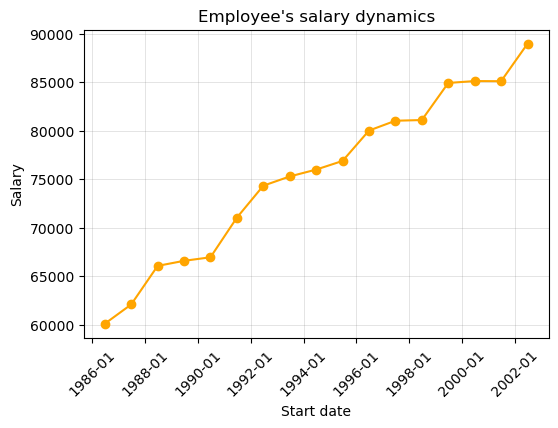

In [131]:
plt.figure(figsize = (6,4))
plt.plot(dynamic_salary_pd['from_date'], dynamic_salary_pd['salary'], marker='o', linestyle='-', color='orange')
plt.xlabel('Start date')
plt.ylabel('Salary')
plt.title("Employee's salary dynamics")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha = 0.3);

#### 13.Determine the salary rank within the department.
Print emp_no, dept_name, current salary and the rank of the employee in his department by salary.

In [134]:
rank_salary = """
WITH curr_salary AS(
SELECT s.emp_no,
			s.salary
	FROM salaries s
	WHERE s.to_date = '9999-01-01'
), 
departs AS (
	SELECT de.emp_no,
			d.dept_name
	FROM departments d
	JOIN dept_emp de ON de.dept_no = d.dept_no
) 
SELECT cr.emp_no,
		d.dept_name,
		cr.salary,
		RANK() OVER (PARTITION BY d.dept_name ORDER BY cr.salary DESC) AS salary_rank
FROM curr_salary cr
JOIN departs d ON d.emp_no = cr.emp_no;
"""

In [136]:
pd.read_sql(rank_salary, con)

,emp_no,dept_name,salary,salary_rank
0,18006,Customer Service,144866,1
1,96957,Customer Service,143950,2
2,432583,Customer Service,143937,3
3,98169,Customer Service,143832,4
4,485205,Customer Service,141555,5
...,...,...,...,...
265327,490805,Sales,40661,41996
265328,213121,Sales,40652,41997
265329,469059,Sales,40518,41998
265330,222098,Sales,40392,41999


#### 14. Finding the change in employee's salary over the past 2 years for employee emp_no = 10001

In [139]:
salary_2_years_ago = """
SELECT emp_no, 
			salary, 
			to_date,
			from_date,
			LAG(salary,2) OVER(ORDER BY from_date) as salary_2_years_ago,
			salary - LAG(salary,2) OVER(ORDER BY from_date) as salary_difference
FROM salaries
WHERE emp_no = '10001'
ORDER BY from_date DESC 
LIMIT 1; 
"""

In [141]:
pd.read_sql(salary_2_years_ago,con)

,emp_no,salary,to_date,from_date,salary_2_years_ago,salary_difference
0,10001,88958,9999-01-01,2002-06-22,85112,3846


#### 15. Determining the highest salary increase. 
Find the employee who received the largest salary increase during the year that ended 1 year before the most recent date in the database (maximum value from_date in the salaries table). 

In [144]:
highest_update_salary = """
WITH max_date AS (
	SELECT MAX(from_date) as latest_data 
	FROM salaries
),
SalaryDiff AS (
	SELECT s.emp_no,
			LAG(salary) OVER (PARTITION BY s.emp_no ORDER BY from_date) AS previous_salary,
			salary,
			salary - LAG(salary) OVER (PARTITION BY s.emp_no ORDER BY from_date) as difference
	FROM salaries s
	JOIN max_date md 
	ON s.from_date BETWEEN DATE_SUB(latest_data, INTERVAL 2 YEAR) 
                   AND DATE_SUB(latest_data, INTERVAL 1 YEAR)
)
SELECT emp_no,
		salary as current_salary,
		previous_salary,
		MAX(difference) as max_difference
FROM SalaryDiff
GROUP BY 1,2,3
ORDER BY max_difference DESC 
LIMIT 1;
"""

In [146]:
pd.read_sql(highest_update_salary, con)

,emp_no,current_salary,previous_salary,max_difference
0,278208,73416,68917,4499


#### 16. Find the average salary and the first employee in each position. 
For each position, print its name, the average salary of the employees in it, the name of the first employee (or employees if several people were hired for this position on the same day) who was hired for this position (according to the hire_date), and the hire_date of this employee or employees.

In [149]:
first_emp_salary = """
WITH AverageSalary AS (
    SELECT t.title, AVG(s.salary) as avg_salary
    FROM titles t
    JOIN salaries s ON t.emp_no = s.emp_no
    WHERE t.to_date = '9999-01-01' AND s.to_date = '9999-01-01'
    GROUP BY t.title
),
EarliestHire AS (
    SELECT t.title, MIN(e.hire_date) as earliest_hire_date
    FROM titles t
    JOIN employees e ON t.emp_no = e.emp_no
    WHERE t.to_date = '9999-01-01'
    GROUP BY t.title
)
SELECT a.title, 
       a.avg_salary, 
       GROUP_CONCAT(DISTINCT e.first_name ORDER BY e.first_name ASC) as first_employees, 
       eh.earliest_hire_date
FROM AverageSalary a
JOIN EarliestHire eh ON a.title = eh.title
JOIN employees e ON eh.earliest_hire_date = e.hire_date
JOIN titles t ON e.emp_no = t.emp_no AND t.title = a.title AND t.to_date = '9999-01-01'
GROUP BY a.title
ORDER BY a.title, first_employees;
"""

In [151]:
pd.read_sql(first_emp_salary, con)

,title,avg_salary,first_employees,earliest_hire_date
0,Assistant Engineer,57317.5736,"Arco,Selwyn",1985-02-02
1,Engineer,59602.7378,Taizo,1985-02-01
2,Manager,77723.6667,Isamu,1985-01-14
3,Senior Engineer,70823.4376,"Arvin,Gian,Jayesh,Kannan,Mona,Poorav,Zdislav",1985-02-01
4,Senior Staff,80706.4959,"Ebru,Margareta",1985-01-01
5,Staff,67330.6652,"Arie,Przemyslawa,Shirish,Tonny",1985-01-01
6,Technique Leader,67506.5903,"DeForest,Krassimir,Peternela",1985-01-01


#### 17. Divide the given employees into 3 groups according to their current salary. Print `emp_no`, `first_name`, `last_name`, salary and group number for each employee.

The `emp_no` of employees whose salaries are to be investigated: `419748, 496734, 264134, 209076, 86631, 456171, 16887, 230255, 246465, 420097, 44362, 280370, 479975, 433320, 473949`

In [ ]:
diveded_group = """
WITH selected_emp AS (
	SELECT e.emp_no,
		e.first_name,
		e.last_name,
		s.salary
	FROM employees e 
	JOIN salaries s 
	ON e.emp_no = s.emp_no 
	WHERE s.to_date = '9999-01-01'
		AND e.emp_no IN (419748, 496734, 264134, 209076, 86631, 456171, 16887, 230255, 246465, 420097, 44362, 280370, 479975, 433320, 473949)
)
SELECT emp_no,
		first_name,
		last_name,
		salary,
		NTILE(3) OVER(ORDER BY salary DESC) as salary_group
FROM selected_emp